# Understanding the biopsychosocial needs and morbidity after road-related injuries in Washington, D.C.

> Kathy Zhang

## Introduction

Road-related injuries represent a significant public health concern and are a leading cause of emergency department utilization, disability, and long-term morbidity. While clinical care traditionally focuses on the immediate physical consequences of trauma, growing evidence indicates that recovery is shaped by a broader constellation of factors that extend beyond injury severity alone. A biopsychosocial approach, which considers biological characteristics, psychological responses, and social conditions, offers a more comprehensive framework for understanding patient outcomes after road-related injuries. Biological needs include acute injury characteristics and comorbid medical conditions; psychological factors encompass stress, coping ability, fear, and trauma-related symptoms; and social determinants include neighborhood environment, socioeconomic resources, and community support. Metrics such as the Distressed Communities Index (DCI) categorize patients’ residential areas and capture how socioeconomic context may contribute to disparities in access to care, follow-up, and recovery. Despite increased attention to these complexities, research remains limited on how biopsychosocial variables influence emergency department outcomes, particularly emergency department length of stay and clinical disposition. Understanding these relationships can help inform more patient-centered trauma care and guide interventions to reduce morbidity after road-related injuries.

## Literature Review

Road traffic injuries (RTIs) are a major cause of long-term morbidity worldwide and impose a significant psychological burden on survivors. A pooled meta-analysis found that approximately 22% of RTI survivors meet criteria for post-traumatic stress disorder (PTSD) (Lin et al., 2018). Longitudinal studies show that psychological consequences persist well beyond the initial trauma. For example, more than one-third of injured adults report PTSD symptoms and nearly 20% experience depression during follow-up after a motor vehicle accident (Heron-Delaney et al., 2013). Mental health symptoms frequently co-occur with physical sequelae such as pain. Pozzato et al. (2020) found that comorbidity between pain interference and mental health problems, including post-traumatic stress and depressive symptoms, persisted up to 12 months post-injury. These findings underscore that psychological distress following road-related injury is not an acute, self-limited condition but rather a chronic component of morbidity that requires clinical attention.

Beyond individual physical and psychological effects, road-related injuries are shaped by broader social determinants, including neighborhood context and socioeconomic resources. Evidence suggests that community-level disadvantage may influence neurobiological and functional outcomes after trauma. For example, neighborhood socioeconomic disadvantage has been associated with altered resting-state connectivity in brain regions responsible for emotional regulation—such as the amygdala, hippocampus, and ventromedial prefrontal cortex—among recently injured adults (Webb et al., 2021). These findings parallel research in traumatic brain injury showing that social determinants of health contribute significantly to long-term functional outcomes independent of injury severity (Corrigan et al., 2025). Taken together, these studies support a biopsychosocial model of post-injury morbidity, in which physical trauma, psychological responses, and socioeconomic context interact to shape recovery trajectories.

In addition to psychological and socioeconomic influences, multiple studies have considered the lasting physical consequences of RTIs, including pain, disability, and functional impairment. A systematic review of the long-term consequences of road traffic injuries found that survivors frequently report chronic pain, reduced mobility, and difficulties performing daily tasks for months or even years after the incident (Haagsma et al., 2016). Persistent physical symptoms often require ongoing health services, rehabilitation, and vocational support, contributing to substantial personal and societal costs. These biological and functional outcomes can also exacerbate psychological distress and social challenges, creating a cycle of morbidity that affects overall quality of life. Despite extensive research on long-term impacts, few studies have investigated acute clinical outcomes—such as emergency department length of stay—and how they may be influenced by psychosocial or community-level characteristics. This gap highlights the need for research that integrates biological, psychological, and social variables to better understand disparities in acute care and long-term recovery following road-related injuries.


## Methods

### Data and Variables
This study utilized survey data collected from emergency department patients presenting with road-related injuries. The dataset included demographic characteristics (age, sex, race/ethnicity), injury-related variables (mechanism of injury, disposition), psychosocial survey responses, and socioeconomic indicators. A detailed data dictionary was reviewed to define, categorize, and code all variables prior to analysis.

The primary socioeconomic variable was DCI (Distressed Communities Index) rank, which categorizes communities based on their economic well-being. The rank ranges from 1 to 5, with 1 indicating "Distressed" communities facing significant economic challenges, and 5 representing "Very Prosperous" communities with strong economic health. This ranking helps assess the socioeconomic status of the areas where patients reside, which can be an important factor in understanding health outcomes and access to resources. Additional psychosocial variables included perceived neighborhood safety, stress frequency, and coping ability, measured on Likert scales ranging from “none of the time” to “all of the time,” and “strongly agree” to “strongly disagree.” Biological variables included emergency department length of stay (LOS), clinical disposition (discharged, admitted to ICU, admitted to surgery/medicine bed), and other injury characteristics documented upon admission.



### Data Management
Raw survey exports contained repeated records and text responses. Data cleaning procedures included removal of exact duplicates, recoding categorical variables, and conversion of emergency department LOS into numeric values (minutes) based on text parsing of days, hours, and minutes. Variables such as disposition, DCI rank, stress levels, and neighborhood safety were converted to ordered categorical types using standard labeling based on the response options provided in the survey instrument. Missing data were inspected and handled using case-wise deletion for descriptive and inferential analyses.

### Statistical Analysis
Descriptive statistics were generated to summarize demographic and clinical characteristics of the patient population, including frequency distributions for categorical variables and means or medians for continuous variables. Visualization techniques such as histograms and boxplots were used to explore the distribution of key variables, including emergency department LOS by disposition and DCI rank. Inferential analyses included ordinary least squares (OLS) regression models to assess the association between ED LOS (dependent variable) and socioeconomic, psychosocial, and clinical predictors. Specifically, separate regression models were constructed to examine the relationship between ED LOS and DCI rank, stress responses, and perceived neighborhood safety.

All analyses were performed using Python within Visual Studio Code (VS Code). Statistical packages included pandas for data manipulation, seaborn and matplotlib for graphical visualization, and statsmodels for linear regression modeling. Results were evaluated at a significance threshold of α = 0.05. Summary statistics, regression coefficients, confidence intervals, and p-values were reported to characterize relationships between biopsychosocial variables and ED LOS.

### Python Package Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re

### Data Import and Cleaning

In [6]:
# Import the 'accident_data.csv' and assign the file to the variable 'data'
data = pd.read_csv('accident_data.csv')

In [7]:
# Delete 'redcap_repeat_instance', 'redcap_survey_identifier', and 'form_1_timestamp' columns
cols_to_drop = ['redcap_repeat_instance', 'redcap_survey_identifier', 'form_1_timestamp']
# Remove exact duplicate rows
data = data.drop_duplicates()
data = data.drop(columns=cols_to_drop)

In [8]:
# Combine data into one line per record_id and then resave the data as 'combined_accident_data.csv'
# Use dropna() so missing values don't become the string 'nan' when joined
combined_data = data.groupby('record_id').agg(lambda x: ' '.join(x.dropna().astype(str))).reset_index()
combined_data.to_csv('combined_accident_data.csv', index=False)

## Data Analysis

In [89]:
# Convert all columns to numeric where possible
for col in combined_data.columns:
    combined_data[col] = pd.to_numeric(combined_data[col], errors='ignore')
# Calculate the counts of 'form_1_complete' and 'eligibility' columns
form_1_counts = combined_data['form_1_complete'].value_counts()
print(form_1_counts)
eligibility_counts = combined_data['eligibility_and_enrollment_complete'].value_counts()
print(eligibility_counts)
# Calculate the counts of 'er_1week', 'over_18', and 'patient_police_custody' columns
er_1week_counts = combined_data['er_1week'].value_counts()
print(er_1week_counts)
over_18_counts = combined_data['over_18'].value_counts()
print(over_18_counts)
patient_police_custody_counts = combined_data['patient_police_custody'].value_counts()
print(patient_police_custody_counts)

# Convert disposition column to categorical type
combined_data['disposition'] = combined_data['disposition'].astype('category')
# Rename disposition categories where 1 = 'Discharged', 2 = 'Admitted to ICU', and 3 = 'Admitted to Surgery/Medicine bed'
combined_data['disposition'] = combined_data['disposition'].cat.rename_categories({
    1: 'Discharged',
    2: 'Admitted to ICU',
    3: 'Admitted to Surgery/Medicine bed'
})
# Convert DCI_rank column to categorical type where 1 = Distressed, 2 = At risk, 3 = Comfortable, 4 = Prosperous, 5 = Very Prosperous
combined_data['dci_rank'] = combined_data['dci_rank'].astype('category')
combined_data['dci_rank'] = combined_data['dci_rank'].cat.rename_categories({
    1: 'Distressed',
    2: 'At risk',
    3: 'Comfortable',
    4: 'Prosperous',
    5: 'Very Prosperous'
})

# Convert the nervous_stressed column to categorical type where 1 = None of the time, 2 = A little of the time, 3 = Some of the time, 4 = Most of the time, 5 = All of the time
combined_data['nervous_stressed'] = combined_data['nervous_stressed'].astype('category')
combined_data['nervous_stressed'] = combined_data['nervous_stressed'].cat.rename_categories({
    1: 'None of the time',
    2: 'A little of the time',
    3: 'Some of the time',
    4: 'Most of the time',
    5: 'All of the time'
})

# Convert the safe_neighborhood column to categorical type where 1 = Strongly agree, 2 = Agree, 3 = Disagree, 4 = Strongly disagree, 5 = Don't know/Not sure
combined_data['safe_neighborhood'] = combined_data['safe_neighborhood'].astype('category')
combined_data['safe_neighborhood'] = combined_data['safe_neighborhood'].cat.rename_categories({
    1: 'Strongly agree',
    2: 'Agree',
    3: 'Disagree',
    4: 'Strongly disagree',
    5: "Don't know/Not sure"
})


form_1_complete
2.0    85
Name: count, dtype: int64
eligibility_and_enrollment_complete
2.0        83
2.0 2.0     2
Name: count, dtype: int64
er_1week
1.0        83
1.0 1.0     2
Name: count, dtype: int64
over_18
1.0        83
1.0 1.0     2
Name: count, dtype: int64
patient_police_custody
2.0        83
2.0 2.0     2
Name: count, dtype: int64


/var/folders/mw/kxmlhdjd73v4lgkb90ch9pwr0000gn/T/ipykernel_50000/2541904107.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  combined_data[col] = pd.to_numeric(combined_data[col], errors='ignore')


### Figures and Graphs

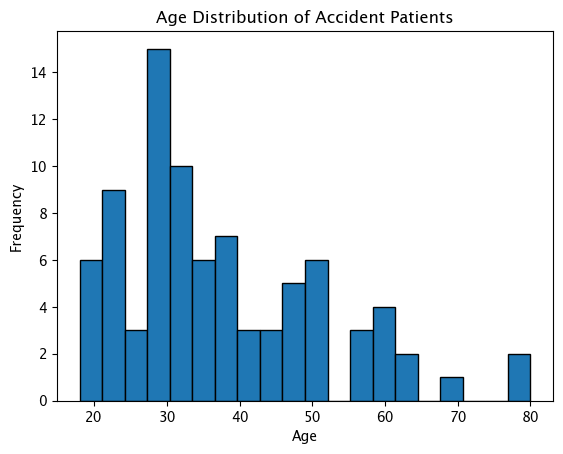

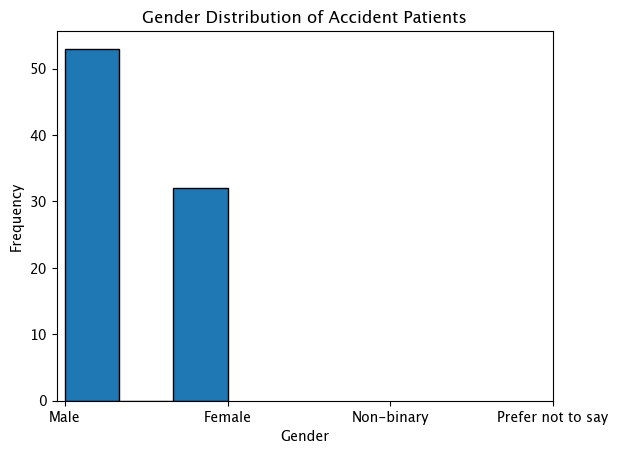

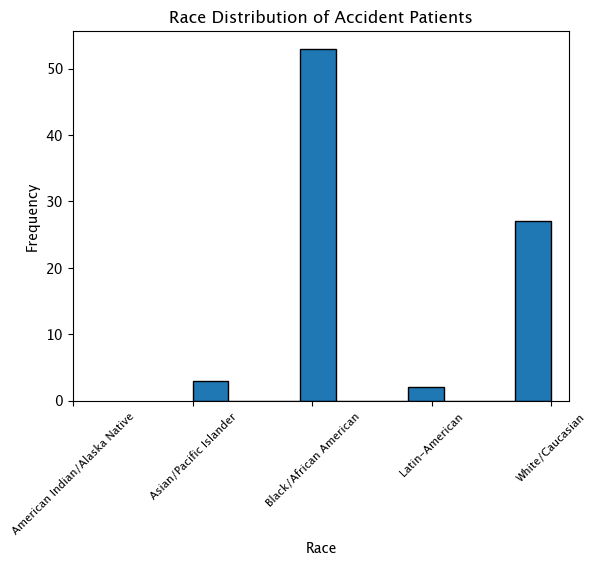

In [ ]:
# Generate a histogram for the 'age' column
plt.hist(combined_data['age'].dropna(), bins=20, edgecolor='black')
plt.title('Age Distribution of Accident Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Generate a histogram for the 'gender' column
plt.hist(combined_data['gender'].dropna(), bins=3, edgecolor='black')
plt.title('Gender Distribution of Accident Patients')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4], ['Male', 'Female', 'Non-binary', 'Prefer not to say'])
plt.show()

# Generate a histogram for the 'race' column where 1 = American Indian or Alaska Native, 2 = Asian / Pacific Islander, 3 = Black or African American, 4 = Latin-American, 5 = White / Caucasian and ensure that the x-axis labels are readable
plt.hist(combined_data['race'].dropna(), bins=10, edgecolor='black')
plt.title('Race Distribution of Accident Patients')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5], ['American Indian/Alaska Native', 'Asian/Pacific Islander', 'Black/African American', 'Latin-American', 'White/Caucasian'], rotation=45, fontsize=8)
plt.show()



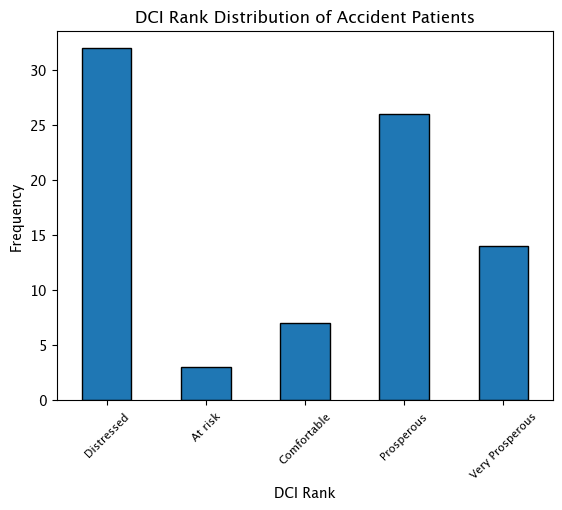

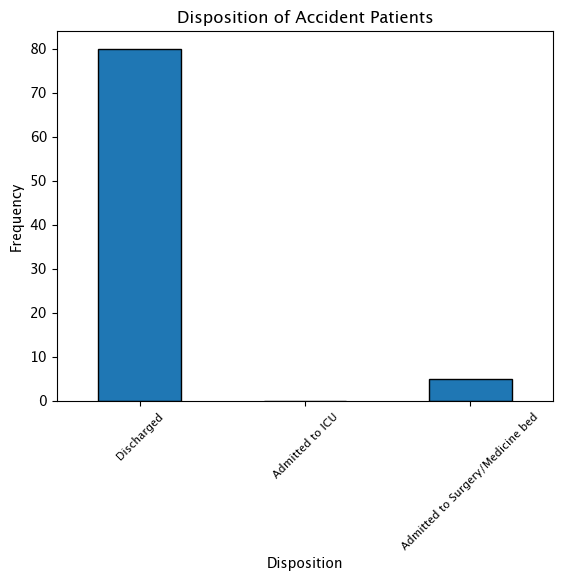

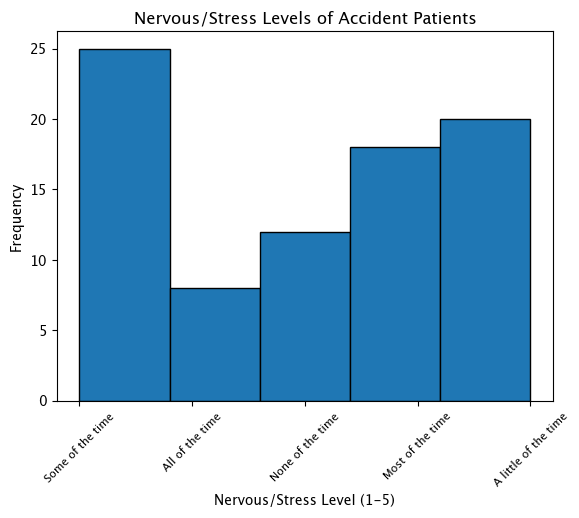

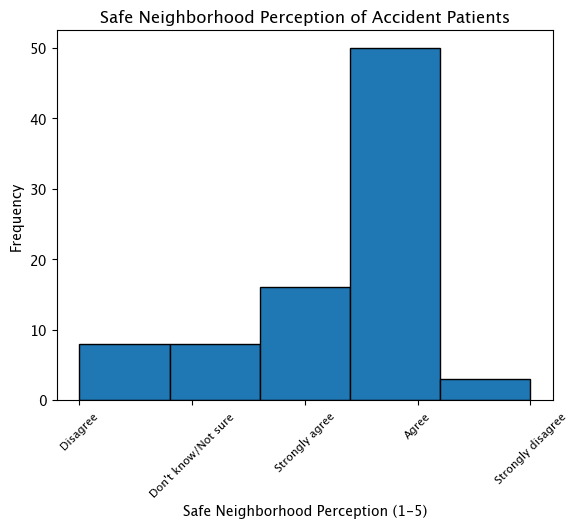

In [92]:
# Generate a histogram for DCI rank column and include counts for each category even if some categories have zero counts
dci_rank_counts = combined_data['dci_rank'].value_counts().reindex(['Distressed', 'At risk', 'Comfortable', 'Prosperous', 'Very Prosperous'], fill_value=0)
dci_rank_counts.plot(kind='bar', edgecolor='black')
plt.title('DCI Rank Distribution of Accident Patients')
plt.xlabel('DCI Rank')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=8)
plt.show()

# Generate a histogram for the disposition column and include counts for each category even if some categories have zero counts
disposition_counts = combined_data['disposition'].value_counts().reindex(['Discharged', 'Admitted to ICU', 'Admitted to Surgery/Medicine bed'], fill_value=0)
disposition_counts.plot(kind='bar', edgecolor='black')
plt.title('Disposition of Accident Patients')
plt.xlabel('Disposition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=8)
plt.show()

# Generate a histogram for the 'nervous_stressed' column
plt.hist(combined_data['nervous_stressed'].dropna(), bins=5, edgecolor='black')
plt.title('Nervous/Stress Levels of Accident Patients')
plt.xlabel('Nervous/Stress Level (1-5)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=8)
plt.show()

# Generate a histogram for the 'safe_neighborhood' column
plt.hist(combined_data['safe_neighborhood'].dropna(), bins=5, edgecolor='black')
plt.title('Safe Neighborhood Perception of Accident Patients')
plt.xlabel('Safe Neighborhood Perception (1-5)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=8)
plt.show()


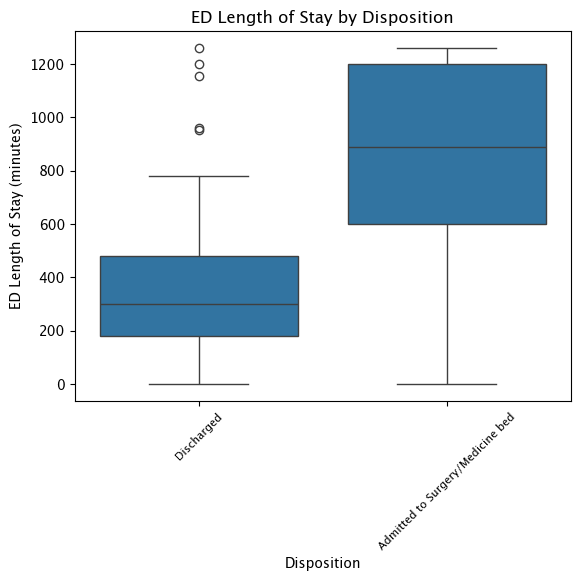

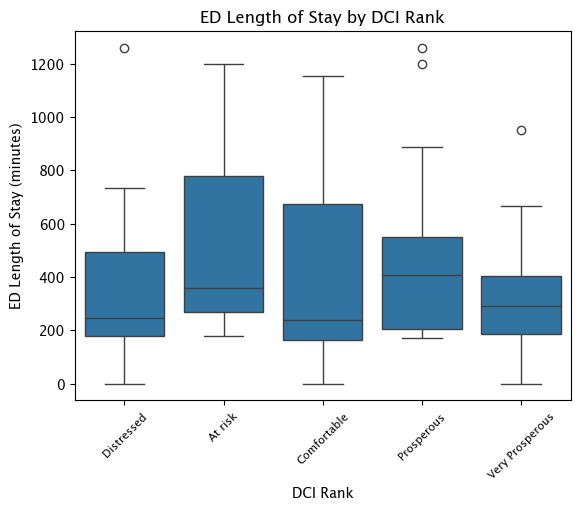

In [88]:
# ED LOS column responses are text strings; convert to numeric (minutes) and create a new column 'ed_los' in combined_data
def convert_los_to_minutes(x):
    if pd.isna(x):
        return np.nan
    # If already a number (int/float), return as minutes
    if isinstance(x, (int, float)):
        return float(x)
    s = str(x).lower().strip()
    total_minutes = 0.0
    # days
    m_day = re.search(r'(\d+)\s*day', s)
    if m_day:
        total_minutes += 24 * 60 * int(m_day.group(1))
    # hours
    m_hour = re.search(r'(\d+)\s*(hour|hours|hr|hrs|h)\b', s)
    if m_hour:
        total_minutes += 60 * int(m_hour.group(1))
    # minutes
    m_min = re.search(r'(\d+)\s*(minute|minutes|min|mins|m)\b', s)
    if m_min:
        total_minutes += float(m_min.group(1))
    # HH:MM (3:45, 1:30)
    if total_minutes == 0:
        m_hhmm = re.search(r'(\d+):(\d+)', s)
        if m_hhmm:
            h = int(m_hhmm.group(1))
            m = int(m_hhmm.group(2))
            total_minutes = 60*h + m
    return total_minutes if total_minutes > 0 else np.nan
combined_data["ed_los_minutes"] = combined_data["ed_los"].apply(convert_los_to_minutes)

# Generate a boxplot for ED LOS by disposition and rename 1 = Discharged and 3 = Admitted to surgery/medicine bed
sns.boxplot(x='disposition', y='ed_los_minutes', data=combined_data)        
plt.title('ED Length of Stay by Disposition')
plt.xlabel('Disposition')
plt.ylabel('ED Length of Stay (minutes)')
plt.xticks(rotation=45, fontsize=8)
plt.show()
# Generate a boxplot for ED LOS by DCI rank
sns.boxplot(x='dci_rank', y='ed_los_minutes', data=combined_data)
plt.title('ED Length of Stay by DCI Rank')
plt.xlabel('DCI Rank')
plt.ylabel('ED Length of Stay (minutes)')
plt.xticks(rotation=45, fontsize=8)
plt.show() 

### Linear Regression Results

In [93]:
# Conduct a linear regression analysis to examine the relationship between ED LOS (dependent variable) and DCI rank as the independent variable
model_1 = smf.ols(
    "ed_los_minutes ~ C(dci_rank)",
    data=combined_data
).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:         ed_los_minutes   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.8126
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.521
Time:                        18:57:42   Log-Likelihood:                -581.62
No. Observations:                  82   AIC:                             1173.
Df Residuals:                      77   BIC:                             1185.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [96]:
# Conduct a linear regression analysis to examine the relationship between ED LOS (dependent variable) and nervous_stressed as the independent variable

model_2 = smf.ols(
    "ed_los_minutes ~ C(nervous_stressed)",
    data=combined_data
).fit()
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:         ed_los_minutes   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.4102
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.801
Time:                        18:58:31   Log-Likelihood:                -588.80
No. Observations:                  83   AIC:                             1188.
Df Residuals:                      78   BIC:                             1200.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [95]:
# Conduct a linear regression analysis to examine the relationship between ED LOS (dependent variable) and safe_neighborhood as the independent variable

model_3 = smf.ols(
    "ed_los_minutes ~ C(safe_neighborhood)",
    data=combined_data
).fit()
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:         ed_los_minutes   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.1828
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.947
Time:                        18:58:07   Log-Likelihood:                -602.99
No. Observations:                  85   AIC:                             1216.
Df Residuals:                      80   BIC:                             1228.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

## Results

A total of approximately 85 patient records were included in the analysis. Descriptive statistics indicated variability across key demographic and socioeconomic variables, including age, race, gender, disposition, and community economic status (DCI rank). The majority of patients were discharged from the emergency department, with smaller proportions admitted to an intensive care unit (ICU) or transferred to a surgery/medicine bed. DCI rank values ranged from “Distressed” to “Very Prosperous,” enabling comparison across neighborhood economic groups.

### Emergency Department Length of Stay by Disposition
Box plot visualization demonstrated notable differences in emergency department length of stay (ED LOS) based on clinical disposition. Patients admitted to the ICU or admitted to a surgery/medicine bed exhibited substantially longer ED LOS compared to those discharged. Median ED LOS appeared lowest among discharged patients and highest among those admitted to surgery or inpatient units, suggesting more complex medical management and delays associated with hospital admission processes. However, variability within disposition groups was wide, indicating considerable heterogeneity in patient flow and throughput.

### Emergency Department Length of Stay by DCI Rank
ED LOS was also examined by socioeconomic group using DCI rank. Box plots showed no clear or consistent trend in ED LOS across DCI categories. Although patients in the “At risk” and “Prosperous” groups displayed slightly higher median ED LOS compared to “Distressed” and “Very Prosperous” ranks, visual inspection did not indicate substantial separation among groups. Overall, ED LOS did not appear strongly patterned by neighborhood economic context.

### Linear Regression Analyses
Three ordinary least squares (OLS) regression models were constructed to examine associations between ED LOS (in minutes) and DCI rank, psychological stress (“nervous/stressed”), and perceived neighborhood safety (“safe neighborhood”):
ED LOS and DCI rank:
The model demonstrated no statistically significant relationship between ED LOS and DCI rank (F(4,77) = 0.813, p = 0.521). The model explained 4.1% of the variance in ED LOS (R² = 0.041), and no individual DCI category coefficient reached statistical significance. Results suggest that socioeconomic context, as measured by DCI rank, was not a meaningful predictor of ED LOS in this sample.
ED LOS and psychological stress:
The association between ED LOS and reported stress levels was also non-significant (F(4,78) = 0.410, p = 0.801; R² = 0.021). Patients reporting greater frequency of nervousness or stress did not display consistently higher or lower ED LOS. Individual category coefficients were small in magnitude and non-significant, indicating that psychological distress at presentation was not associated with ED throughput.
ED LOS and perceived neighborhood safety:
The final model examining perceived neighborhood safety similarly revealed no significant association with ED LOS (F(4,80) = 0.183, p = 0.947; R² = 0.009). Coefficients across all neighborhood safety categories were close to zero, and confidence intervals were wide, suggesting that neighborhood perceptions did not meaningfully influence ED LOS in this dataset.

Across all regression models, emergency department LOS was not significantly associated with socioeconomic status, reported psychological stress, or perceived neighborhood safety. Disposition status displayed the clearest visual differences in ED LOS, with admitted patients experiencing longer stays than discharged patients. However, biopsychosocial variables measured in this study did not significantly predict ED LOS when examined using linear regression models.


## Discussion

This study examined biopsychosocial factors associated with emergency department length of stay (ED LOS) among patients presenting with road-related injuries. Although visual inspection demonstrated that ED LOS differed by clinical disposition—with longer stays observed among patients admitted to higher levels of care—regression analyses revealed no statistically significant associations between ED LOS and socioeconomic status, psychological stress, or perceived neighborhood safety. These findings suggest that, within this sample, clinical needs and treatment processes may play a more substantial role in determining ED throughput than psychosocial or community-level characteristics.

The absence of significant associations between ED LOS and Distressed Communities Index (DCI) rank contrasts with prior evidence indicating that socioeconomic factors often influence healthcare utilization, access to services, and post-discharge recovery. One possible explanation is that ED LOS is strongly determined by structural and logistical elements internal to the hospital, such as bed availability, diagnostic imaging time, specialist consultation, or staffing levels, which may overshadow patient-level psychosocial characteristics. Similarly, psychological stress and neighborhood perceptions were not significantly related to ED LOS, despite theoretical models suggesting that emotional distress and social context can affect pain perception, help-seeking behaviors, and communication during clinical encounters.

It is also important to consider sample size and variability in this analysis. Although trends were visible in box plots, the regression models demonstrated low R² values, indicating that the variables examined explained only a very small portion of variability in ED LOS. This suggests the possibility of unmeasured variables, such as injury mechanism, triage acuity level, insurance status, or availability of trauma services, which may be more strongly associated with ED length of stay. The findings highlight the complexity of ED operations and suggest that biopsychosocial influences on morbidity may emerge more clearly in outcomes measured beyond the initial ED encounter, such as hospital length of stay, readmission, pain severity, or follow-up adherence.

Despite non-significant results, the study supports the importance of exploring biopsychosocial needs among patients with road-related injuries. Understanding socioeconomic vulnerability, stress levels, and neighborhood conditions remains valuable for discharge planning, community referrals, and long-term recovery, even if these variables do not directly impact ED throughput in this dataset. Future research should consider larger sample sizes, prospective survey designs, and additional clinical variables to better identify determinants of ED LOS and post-injury morbidity.

## Conclusion

This analysis did not identify significant relationships between biopsychosocial variables and emergency department length of stay among patients presenting with road-related injuries. Although disposition status influenced ED LOS visually, socioeconomic status, psychological stress, and neighborhood perceptions were not significant predictors in linear regression models. These findings indicate that ED operational factors and clinical treatment needs may be stronger drivers of length of stay than patient-level biopsychosocial characteristics.

While ED LOS may not be directly affected by psychosocial and socioeconomic factors in this sample, a biopsychosocial approach remains essential for understanding overall morbidity and post-injury recovery. Recognizing the broader context in which injured patients live—particularly those from distressed communities—can guide clinical decision-making, improve care coordination, and support equitable outcomes after road-related injuries. Future studies should examine biopsychosocial predictors of additional outcomes, including pain trajectories, functional recovery, and long-term disability, to build a more comprehensive model of post-injury health.

## References

Corrigan, J. D., Bogner, J. A., Foulkes, M. A., & Heinemann, A. W. (2025). The contribution of social determinants of health to long-term outcomes after traumatic brain injury. Journal of Head Trauma Rehabilitation, 40(2), 87–95. https://doi.org/10.1016/j.jht.2025.01.004

Haagsma, J. A., Graetz, N., Bolliger, I., Naghavi, M., Higashi, H., Mullany, E. C., et al. (2016). The long-term consequences of road traffic injuries: A systematic review. Global Health Action, 9, 30774. https://doi.org/10.3402/gha.v9.30774

Heron-Delaney, M., Kenardy, J., Charlton, E., & Matsuoka, Y. (2013). A longitudinal investigation of PTSD and depression after motor vehicle accidents. Journal of Traumatic Stress, 26(2), 182–189. https://doi.org/10.1002/jts.21796

Lin, W., Chen, Q., Zhang, Q., & Chen, X. (2018). Prevalence of posttraumatic stress disorder among road traffic accident survivors: A meta-analysis. Medicine, 97(3), e9761. https://doi.org/10.1097/MD.0000000000009761

Pozzato, I., Meares, S., Ranganathan, P., & Cameron, I. D. (2020). Mental health comorbidity and pain interference following road traffic injury. Pain Reports, 5(2), e825. https://doi.org/10.1097/PR9.0000000000000825

Webb, E. K., Shumake, J., & Wemm, S. E. (2021). Neural impact of neighborhood socioeconomic disadvantage among traumatically injured adults. Neurobiology of Stress, 15, 100350. https://doi.org/10.1016/j.ynstr.2021.100350